In [61]:
import matplotlib.pyplot as plt
import numpy as np

from result_utilities import get_filepath, extract_stats

In [62]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm"],
})


In [63]:
dura = 'short'
path = f'./{dura}/{dura}_losses'
# path = './test'

In [64]:
# model_type = ['NNnph','NNnph']
model_type = ['Coxph','NNph','NNnph']
index_dict = {'Coxph' : 0, 'NNph' : 9, 'NNnph' : 18}

case = ['iid','noniid']
# case = ['noniid','noniid']

local_epochs = 1
what = 'local'
flatten = False

In [65]:
files = get_filepath(dura)
indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)
len(avg_rounds)

27

67.0
Coxph iid
43.0
NNph iid
21.0
NNnph iid
11.6
Coxph noniid
11.6
NNph noniid
3.6
NNnph noniid


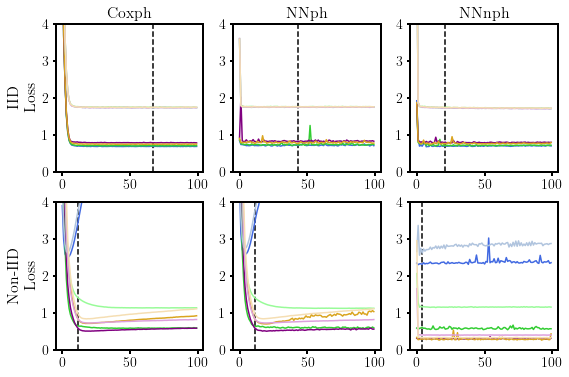

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(9,6))    

ax0label = ax[0][0].set_ylabel('IID \n Loss', fontsize=16)
ax1label = ax[1][0].set_ylabel('Non-IID \n Loss', fontsize=16)



for k, row in enumerate(ax):
    for j, col in enumerate(row):
        for axis in ['top','bottom','left','right']:
            col.spines[axis].set_linewidth(2)
        # col.set_title(f'{model_type[j]},{case[k]}')

        idx = index_dict[model_type[j]]
        adj = 1
        if case[k] == 'noniid':
            adj = 5 
        print(avg_rounds[idx+adj])
        col.axvline(x=avg_rounds[idx+adj], linestyle='dashed',color='black')

        print(model_type[j],case[k])
        filename = f'{path}/{what}_val_loss_M{model_type[j]}C{case[k]}L{local_epochs}.npy'
        losses = np.load(filename)
        if flatten:
            mean = losses.mean(axis=0).mean(axis=0)
            std = losses.std(axis=0).mean(axis=0)
        else:
            mean = losses.mean(axis=0)
            std = losses.std(axis=0)
        color=['royalblue','limegreen','purple','goldenrod']
        if what == 'local' and not flatten:
            for i,m in enumerate(mean):
                col.plot(range(100),m, color=color[i])
                col.fill_between(range(100), m - std[i], m + std[i], alpha=0, color=color[i])
        else:
            col.plot(range(100),mean, color=color[0])
            col.fill_between(range(100), mean - std, mean + std, alpha=0, color=color[0])

        # plt.plot(mean, range(100))

        # plt.fill_between(range(100), mean - std, mean + std)
        filename = f'{path}/{what}_train_loss_M{model_type[j]}C{case[k]}L{local_epochs}.npy'
        losses = np.load(filename)

        if flatten:
            mean = losses.mean(axis=0).mean(axis=0)
            std = losses.std(axis=0).mean(axis=0)
        else:
            mean = losses.mean(axis=0)
            std = losses.std(axis=0)
            
        color=['lightsteelblue','palegreen','plum','wheat']
        if what == 'local' and not flatten:
            for i,m in enumerate(mean):
                col.plot(range(100),m, color[i])
                col.fill_between(range(100), m - std[i], m + std[i], alpha=0, color=color[i])
        else:
            col.plot(range(100),mean, color[0])
            col.fill_between(range(100), mean - std, mean + std, alpha=0, color=color[0])

        col.tick_params(axis='x', labelsize=14)
        col.tick_params(axis='y', labelsize=14)

        # col.set_xticklabels([i * 25 for i in range(3)],fontsize=14)
        # col.set_yticklabels(fontsize=14)
        col.xaxis.set_tick_params(width=2)
        col.yaxis.set_tick_params(width=2)

        x1,x2,y1,y2 = col.axis()  
        col.axis((x1,x2,0,4))
        if k == 0:
            col.set_title(model_type[j], fontsize=16)

In [67]:
path = './losses'
model_type = 'NNnph'
case = 'noniid'
local_epochs = 1
what = 'local'

filename = f'{path}/{what}_val_loss_M{model_type}C{case}L{local_epochs}.npy'
losses = np.load(filename)
mean = losses.mean(axis=0).mean(axis=0)
std = losses.std(axis=0).mean(axis=0)
color=['royalblue','limegreen','purple','goldenrod']

plt.plot(range(100),mean, color=color[0])
plt.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

# plt.plot(mean, range(100))

# plt.fill_between(range(100), mean - std, mean + std)

filename = f'{path}/{what}_train_loss_M{model_type}C{case}L{local_epochs}.npy'
losses = np.load(filename)

mean = losses.mean(axis=0).mean(axis=0)
std = losses.std(axis=0).mean(axis=0)
color=['lightsteelblue','palegreen','plum','wheat']

plt.plot(range(100),mean, color[0])
plt.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,5))
# # plt.legend(['a','b','c','d'])

FileNotFoundError: [Errno 2] No such file or directory: './losses/local_val_loss_MNNnphCnoniidL1.npy'